![](../assets/header_image.png)

# Optional Assignment 4: Visualization of messages in Jupyter Notebook with Jupyros

Welcome to the next optional assignment using Jupyros! This exercise notebook is optional. That means we only recommend this notebook to students who do *not* have expierenced with

- **Robot Operating System (ROS)**
- **Jupyter-ROS**

In this assignment, you will 

- **learn how JupyROS can allow us to use ROS with the Jupyter Notebooks**
- **learn how we can visualize and monitor messages that are published on a certain ROS topic**

# Set up the ROS environment

This command is used to set up the environment for the ROS (Robot Operating System) Noetic distribution. It sets up various environment variables, such as the `ROS_PACKAGE_PATH`, that are necessary for using ROS commands and accessing the packages and libraries included with the Noetic distribution. 

By sourcing this file, the user can use ROS commands and work with the Noetic distribution without setting the environment variables each time.

In [ ]:
!source /opt/ros/noetic/setup.sh

# Adding the ROS python library path to the system's path variables

This code is used to add the path of the ROS Noetic distribution's python library to the system's path variable.
The `sys.path` variable is a list of strings that determines the interpreter's search path for modules. 
By appending the path of the ROS Noetic python library to this list, the interpreter will be able to find and import any modules or packages included in the library when a script runs. This is useful for using ROS functions and modules within a Python script.

In [ ]:
import sys
sys.path.append('/opt/ros/noetic/lib/python3/dist-packages/')

# Importing libaries specific to the ROS and ROS Messages

JupyROS is a library that allows using ROS within Jupyter Notebooks. It provides a set of functions to interact with ROS, in a similar way as it's done in Python ROS Nodes. JupyROS allows to create, publish, subscribe to topics and services.

In [ ]:
import math
import rospy
import jupyros
from geometry_msgs.msg import Vector3

# Now, it is time to launch the master node from the Terminal

For that, execute the following steps,

1. click on **File >> New >> Terminal**

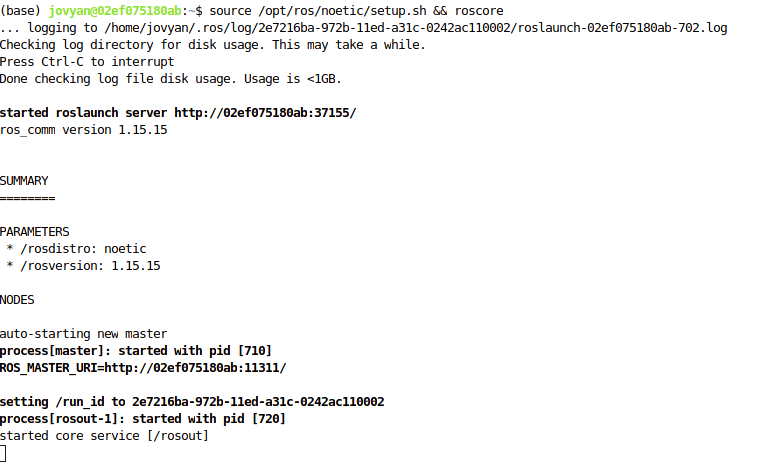

2. Setup the ROS environment again and launch the `roscore` command as follows,


```bash
source /opt/ros/noetic/setup.sh && roscore
```

# Initialize the ROS node 

We use the function `init_node()` which registers a Python ROS node with the name `runner` with the ROS master.

In [ ]:
rospy.init_node('runner')

# Create publisher object with rospy
The following code snippet creates a **publisher** which publishes a Vector3 message on the `/poser` topic at a rate of 5 Hz. The message's x and y fields are set to sine and cosine values based on the value of the variable `i`, which is incremented in each iteration of the while loop. The `rate.sleep()` function is called at the end of each iteration to ensure that the loop runs at the desired rate of 5 times per second. This code will run indefinitely until the program is interrupted.

In [ ]:
%%thread_cell
i = 0
rate = rospy.Rate(5)
pub = rospy.Publisher('/poser', Vector3, queue_size=10)
while True:
    msg = Vector3()
    msg.x = math.sin(i * 0.1)
    msg.y = math.cos(i * 0.1)
    pub.publish(msg)
    i += 1
    rate.sleep()

# Create the subscriber using the Jupyros library
This code snippet creates a subscriber which listens on the `/poser` topic and receives messages of type `Vector3`. When a message is received, the lambda function is called with the received message as its argument, and it prints the x and y fields of the message ( `msg.x` and `msg.y`). This subscriber will keep running and listens to the `/poser` topic.

In [ ]:
jupyros.subscribe('/poser', Vector3, lambda msg: print(msg.x, msg.y))

# Create a live plot with Jupyros

It creates a live plot of the **x** and **y** fields of the `Vector3` messages received on the `/poser` topic. The plot is updated in real-time as new messages are received. 

In [ ]:
jupyros.live_plot('/poser/:x:y', Vector3)

# Stop the master 

Now you should go back to the Terminal and stop the master node by pressing ctrl+ C

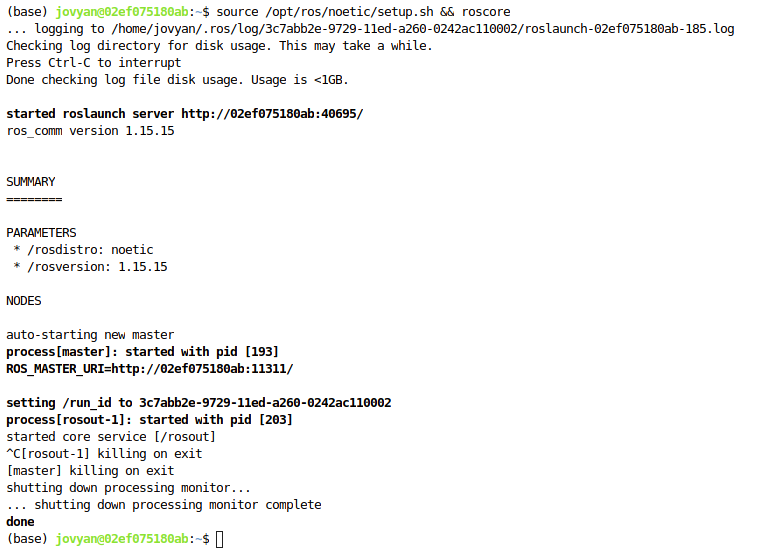

# Wrap up

- You learned about plotting messages in Jupyter Notebooks that are being published over a topic in the ROS environment
- You learned how to define a publisher which publishes messages on a certain topic using the rospy library
- You learned how to define a subscriber which receives messages on a topic and visualizes them with the jupyros library

## License

MIT License

Copyright 2023 Institute for Automotive Engineering of RWTH Aachen University.